In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from cycler import cycler
import yaml

In [4]:
#%% Plotting parameters

DPI_SAVE = 600
DPI_PLOT = 150
# typical one column figure width
FIG_WIDTH = 3.4 #8.636 cm

In [5]:
# load style

plt.style.use('./pv-textbook_inigo.mplstyle')

In [6]:
# load colors

with open('./colors.yaml') as f:
    content = f.read()
    print (content)

colors = {}
yaml_file = open("./colors.yaml", 'r')
yaml_content = yaml.safe_load(yaml_file)
for key, value in yaml_content.items():
    colors[key] = value

colorlist = [colors[key] for key in colors]
plt.rcParams['axes.prop_cycle'] = cycler(color=colorlist)

# Default colors for the book "Fundamentals of Solar Cells 
# and Photovoltaic Systems Engineering"

color1 : '#5FA1D8' #ligthblue
color2 : '#B31F20' #darkred
color3 : '#498F34' #green
color4 : '#EBD741' #darkyellow
color5 : '#F18B45' #orange
color6 : '#002060' #darkblue
color7 : '#55B99D' #turqoise
color8 : '#BDC554' #yellowgreen
color9 : '#4472C4' #blue
color10 : '#B9DEF3' #verylightblue
color11 : 'black'  #black
color12 : '#BDBDBD' #lightgray
color13 : '#696969' #gray
color14 : '#CD853F' #brown
color15 : '#FF7F50' #lightpink


In [7]:
lambdas = np.linspace (0,2000,1000) # in nm
gap = 1240/1.12
QE=(lambdas, [1 if (l<gap) else 0 for l in lambdas])
SR = (QE[0], QE[1]*QE[0]/1240)

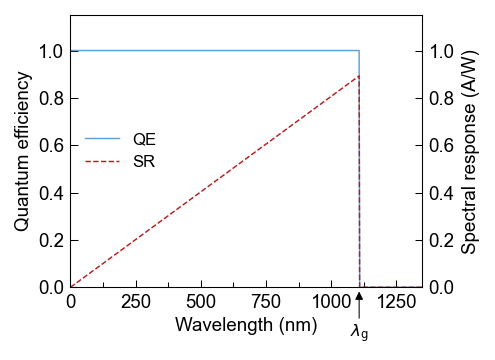

In [9]:
fig = plt.figure(figsize=(FIG_WIDTH, 2.5), dpi=DPI_PLOT)
ax = fig.add_subplot(111)

ax.plot(QE[0], QE[1], label='QE')
ax.plot(SR[0], SR[1], '--', label='SR')

ax.set_xlim(0, 1350)
y_inf = 0
y_sup = 1.15
ax.set_ylim(y_inf, y_sup)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Quantum efficiency')
ax.legend()

plt.annotate(r'$\lambda_{\mathrm{g}}$', (1240/1.12, 0), xytext=(0, -24), textcoords='offset points',
             horizontalalignment='center', fontsize=plt.rcParams["ytick.labelsize"]-1,
             arrowprops=dict(arrowstyle="-|>", lw=0.5, facecolor='black', shrinkA=-1000))

ax2=ax.twinx()
ax2.set_ylim(y_inf, y_sup)
ax2.set_ylabel('Spectral response (A/W)', labelpad=3.5)

plt.tight_layout()

#plt.savefig ('./QE_SR.png', dpi=DPI_SAVE)